# RI 
The idea of this notebook its to do some simple analyis on RI data stored in SPC Sql server db. 

## Load all the data

In [1]:
from sqlalchemy import create_engine, inspect, text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from statsmodels.stats.diagnostic import normal_ad
from scipy import stats
import math

# sns.set_style('whitegrid')
SERVER = 'zam-SPC-rey-db'
DATABASE = 'SPC-Rey'
conn_string = f'mssql+pyodbc://@{SERVER}/{DATABASE}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server'
sql_engine = create_engine(conn_string)
sql_inspector = inspect(sql_engine)

logs_df = pd.read_sql(sql=text("select * from ri_logs"), con=sql_engine.connect())
tests = pd.read_sql(sql=text('select * from ri_tests'), con=sql_engine.connect())

print('logs: ', len(logs_df))
print('tests: ', len(tests))

logs:  20592
tests:  313542


## Select a QA and plot its histogram

In [13]:
qa14 = logs_df['ri_log_id'].loc[(logs_df['review'] == 'A0033L8149')|(logs_df['review'] == 'A0033L8149 A') | (logs_df['review'] == 'A0033L8149A')].tolist()

x_individuals = tests.copy()
x_individuals = x_individuals.loc[(x_individuals['ri_log_id'].isin(qa14))&(tests['superior_limit'] == 1.21) & (tests['inferior_limit'] == 0.71) & (tests['qa'] == '14')]
x_individuals.sort_values(by='id', ascending=False, inplace=True)
# Don't delete
# x_individuals['sample_number'].apply(lambda x: x -5)
# x_individuals = x_individuals.sort_values(by='id', ascending=False)
# sns.histplot(x=x_individuals['sample_value'], kde=True)

# xbar = x_individuals.copy()
# xbar = xbar.groupby('ri_log_id')['sample_value'].mean()
# xbar = xbar.reset_index()
# xbar.sort_values(by='ri_log_id', ascending=False, inplace=True)
# xbar['ri_log_id'] = xbar['ri_log_id'].astype(str)
# xbar_stdev_overall = xbar['sample_value'].std()
# xbar = xbar.head(100)

# # This is for the cards.
# fig, axs = plt.subplots(1,2, sharex=True, sharey=True)

# xi_plot = sns.distplot(x_individuals['sample_value'], ax=axs[0])
# xi_plot.axvline(1.21, color='red')
# xi_plot.axvline(0.71, color='red')


# xbar_hist = sns.distplot(xbar['sample_value'], ax=axs[1])
# xbar_hist.axvline(1.21, color='red')
# xbar_hist.axvline(0.71, color='red')


# print(len(x_individuals))
# print(len(xbar))

# fig.tight_layout()
# plt.show()




In [3]:
# Unccoment this when in Power BI:
# x_individuals = dataset
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.patheffects as path_effects
# from statsmodels.stats.diagnostic import normal_ad
# from scipy import stats
# import math

# last_n = 30
# color_red = '#d64550'
# color_orange = '#d9b300'
# color_blue = '#118DFF'

# # Gets the stats.
# xbar = x_individuals.copy()
# xbar = xbar.groupby('ri_log_id')['sample_value'].mean()
# xbar = xbar.reset_index()
# xbar.sort_values(by='ri_log_id', ascending=False, inplace=True)
# xbar['ri_log_id'] = xbar['ri_log_id'].astype(str)
# xbar_stdev_overall = xbar['sample_value'].std()
# xbar = xbar.head(last_n)
# xbarbar = xbar['sample_value'].mean()
# xbar_stdev_within = xbar['sample_value'].std()
# xbar_ucl = xbarbar + 2 * xbar_stdev_within
# xbar_lcl = xbarbar - 2 * xbar_stdev_within

# usl = x_individuals['superior_limit'].max()
# lsl = x_individuals['inferior_limit'].min()
# tol = 4

# cp = (usl - lsl) / (tol * xbar_stdev_within)
# cpl = (xbarbar - lsl) / ((tol/2) * xbar_stdev_within)
# cpu = (usl - xbarbar) / ((tol/2) * xbar_stdev_within)
# cpk = cpl if cpl < cpu else cpu

# pp = (usl - lsl) / (tol * xbar_stdev_overall)
# ppl = (xbarbar - lsl) / ((tol/2) * xbar_stdev_overall)
# ppu = (usl - xbarbar) / ((tol/2) * xbar_stdev_overall)
# ppk = ppl if ppl < ppu else ppu

# ad, p_value = normal_ad(xbar['sample_value'])


# sns.set_style('whitegrid')
# # This is for the Xbar/R charts
# r = x_individuals.copy()
# r = r.groupby('ri_log_id')['sample_value'].agg(lambda x: x.max() - x.min())
# r = r.reset_index()
# r.sort_values(by='ri_log_id', ascending=False, inplace=True)
# r['ri_log_id'] = r['ri_log_id'].astype(str)
# r = r.head(last_n)
# rbar = r['sample_value'].mean()
# r_stdev = r['sample_value'].std()
# r_ucl = rbar + 2 * r_stdev
# r_lcl = rbar - 2 * r_stdev

# fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
# for i in range(2):
#     axs[i].tick_params(axis='x', rotation=90)

# plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.subplots_adjust(hspace=0.05)

# xbar_chart = sns.lineplot(x=xbar['ri_log_id'], y=xbar['sample_value'], marker='s', ax=axs[0])
# xbar_chart.set(xlabel=None, ylabel='Xbar')
# xbar_chart.axhline(xbar_ucl, color='red')
# xbar_chart.axhline(xbar_lcl, color='red')
# xbar_chart.axhline(xbarbar, color='black')

# r_chart = sns.lineplot(x=r['ri_log_id'], y=r['sample_value'], marker='s', ax=axs[1])
# r_chart.set(xlabel=None, ylabel='R')
# r_chart.axhline(r_ucl, color='red')
# r_chart.axhline(r_lcl, color='red')
# r_chart.axhline(rbar, color='black')







# print('len x i', len(x_individuals))
# print('StDev O', xbar_stdev_overall)
# print('UCL    ', xbar_ucl)
# print('LCL    ', xbar_lcl)
# print('Mean   ', xbarbar)
# print('StDev  ', xbar_stdev_within)
# print('CP     ', cp)
# print('CPK    ', cpk)
# print('PP     ', pp)
# print('PPK    ', ppk)
# print('AD     ', ad)
# print('P-Value', p_value)


# plt.show()

288
1.1461000000000001
StDev O 0.05042206251541249
UCL     1.2225493972823043
LCL     1.069650602717696
Mean    1.1461000000000001
StDev   0.038224698641152056
CP      3.270136964936779
CPK     0.8358470082378386
PP      2.4790735198860876
PPK     0.5347223856087642
AD      1.495427619822987
P-Value 0.0005904885965069002


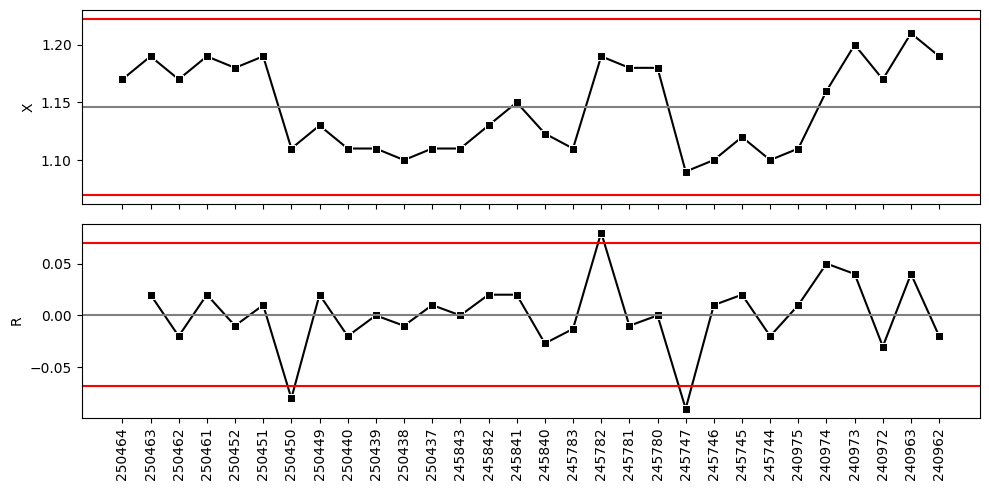

In [16]:
last_x = x_individuals.copy()
print(len(last_x))

overall_std = last_x['sample_value'].std()
overall_mean = last_x['sample_value'].mean()
last_x = last_x.head(30)
last_x['id'] = last_x['id'].astype(str)
last_x_mean = last_x['sample_value'].mean()
last_x_std = last_x['sample_value'].std()

print(last_x_mean)
x_chart_ucl = last_x_mean + 2 * last_x_std
x_chart_lcl = last_x_mean - 2 * last_x_std



mr = last_x.copy()
mr['sample_value'] = mr['sample_value'].diff()
mr_ucl = mr['sample_value'].mean() + 2 * mr['sample_value'].std()
mr_lcl = mr['sample_value'].mean() - 2 * mr['sample_value'].std()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True , figsize =(10,5))

for i in range(2):
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=1)

x_chart = sns.lineplot(data=last_x, x='id', y='sample_value', marker='s', ax=axs[0], color='black')
x_chart.set(xlabel=None, ylabel='X')
x_chart.axhline(x_chart_ucl, color='red')
x_chart.axhline(x_chart_lcl, color='red')
x_chart.axhline(last_x['sample_value'].mean(), color='grey')

mr_chart = sns.lineplot(data=mr, x='id', y='sample_value', marker='s', ax=axs[1], color='black')
mr_chart.set(xlabel=None, ylabel='R')
mr_chart.axhline(mr_ucl, color='red')
mr_chart.axhline(mr_lcl, color='red')
mr_chart.axhline(mr['sample_value'].mean(), color='grey')

usl = last_x['superior_limit'].max()
lsl = last_x['inferior_limit'].min()
tol = 4

cp = (usl - lsl) / (tol * last_x_std)
cpl = (last_x_mean - lsl) / ((tol/2) * last_x_std)
cpu = (usl - last_x_mean) / ((tol/2) * last_x_std)
cpk = cpl if cpl < cpu else cpu

pp = (usl - lsl) / (tol * overall_std)
ppl = (overall_mean - lsl) / ((tol/2) * overall_std)
ppu = (usl - overall_mean) / ((tol/2) * overall_std)
ppk = ppl if ppl < ppu else ppu

ad, p_value = normal_ad(last_x['sample_value'])

print('StDev O', overall_std)
print('UCL    ', x_chart_ucl)
print('LCL    ', x_chart_lcl)
print('Mean   ', last_x_mean)
print('StDev  ', last_x_std)
print('CP     ', cp)
print('CPK    ', cpk)
print('PP     ', pp)
print('PPK    ', ppk)
print('AD     ', ad)
print('P-Value', p_value)

fig.tight_layout()
plt.show()

KeyError: '250464'

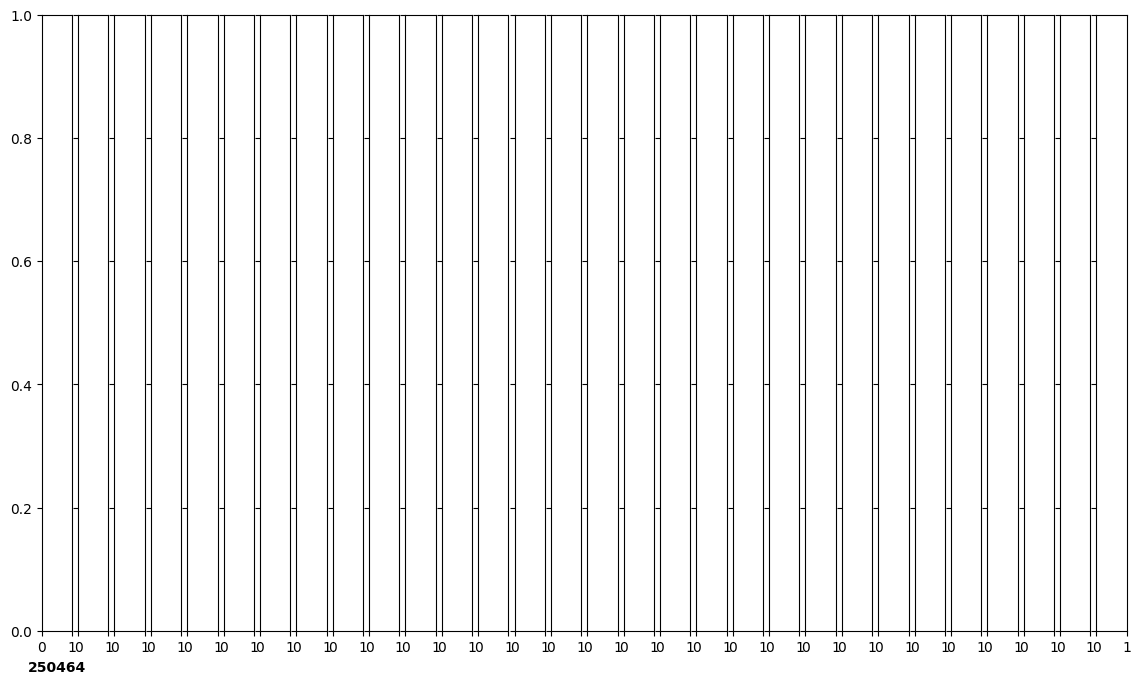

In [5]:
# This is for the cards.
# fig, axs = plt.subplots()
# num_text = plt.text(0.5, 0.6, f'{p_value:.3f}', ha='center', va='center', size=100, color='black')
# label_text = plt.text(0.5, 0.2, 'p-value', ha='center', va='center', size=70, color='#888888')

# plt.axis('off')
# plt.rcParams['axes.facecolor'] = color_red
# plt.rcParams['savefig.facecolor'] = color_red
# fig.tight_layout()
# plt.show()


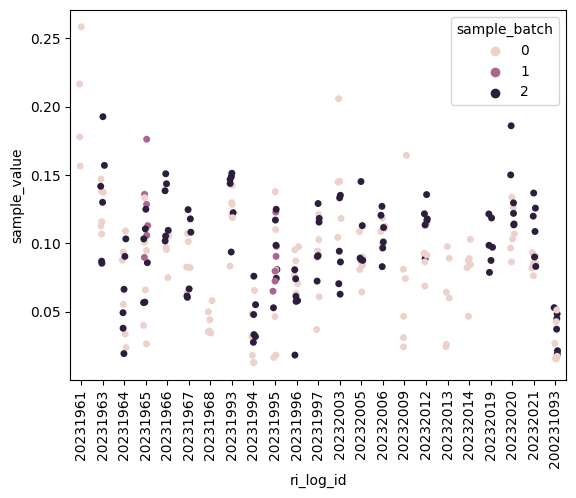

In [6]:
# special = tests.copy()
# special.sort_values(by='ri_log_id', ascending=False, inplace=True)
# special_oval = special.copy().loc[(tests['qa'] == 'OVAL')]
# special_conc = special.copy().loc[(tests['qa'] == 'CONC')]

# special_conc = special_conc.head(250)
# # sns.catplot(data=special_conc['ri_log_id'], x=special_conc['sample_batch'], y=special_conc['sample_value'])

# # g = sns.catplot(data=special_conc, x='sample_batch', y="sample_value", col="ri_log_id", jitter=False)

# # Todo 
# g = sns.stripplot(data=special_conc, x="ri_log_id", y="sample_value", hue="sample_batch")
# g.tick_params(axis='x', rotation=90)


# plt.subplots_adjust(wspace=0)
# plt.savefig('test.png')

# # special_conc.head(12)